# Perceptron



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.seterr('ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
from MultiLayerPerceptron import MultiLayerPerceptron

# Important Functions

In [3]:
def plot_loss(epoch_his, train_loss_his, test_loss_his):
    train_line, = plt.plot(epoch_his,train_loss_his,label = 'train')
    test_line, = plt.plot(epoch_his,test_loss_his,label = 'test')
    plt.xlabel('EPOCHS')
    plt.ylabel('Loss')
    plt.legend([train_line, test_line] , ['train','test'])
    plt.show()

In [4]:
def plot_accuracy(epoch_his, train_acc_his, test_acc_his):
    train_line, = plt.plot(epoch_his,train_acc_his,label = 'train')
    test_line, = plt.plot(epoch_his,test_acc_his,label = 'test')
    plt.xlabel('EPOCHS')
    plt.ylabel('Accuracy')
    plt.legend([train_line, test_line] , ['train','test'])
    plt.show()

# Perceptron Network

In [5]:
# Here I am building a normal forward propogation for a perceptron layer
# and the various function i would use.

In [6]:
#############################################
## Declaring Training Data        ############
#############################################
X_train = np.array([[0,0],[1,0],[0,1],[1,1]])
Y_train = np.array([[1],[0],[0],[0]])

In [7]:
# Declare a neuron with shape of weights as [shape_of_input,1]
model = MultiLayerPerceptron([2,1],['sigmoid'])
# print(model.layers[1].W)
# print(model.layers[1].b)

(2, 1) (1,)
<function sigmoid at 0x7f1c106109d8>


In [8]:
# testing the model outputs
pred , _ = model.forward(X_train)
# print(np.sum((pred > 0.5)== Y_train) / Y_train.shape[0])
# accuracy(model , X_train,Y_train)
# X_train[0]

In [9]:
# Checking for testing purposes(BCE should be used here ideally)
from Loss import mean_abs_error,mean_square_error
loss,d_back = mean_square_error(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

The loss is [0.24392534]
And the error to be back propogated is:
 [[-0.125     ]
 [ 0.17977535]
 [ 0.17087618]
 [ 0.21170693]]


In [10]:
from Loss import binary_cross_entropy,mean_binary_cross_entropy
loss,d_back = binary_cross_entropy(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

The loss is [4.98954764]
And the error to be back propogated is:
 [[-2.        ]
 [ 3.56000351]
 [ 3.15960491]
 [ 6.52859617]]


In [11]:
# Now we can train the model by iteratively on each datapoint.

layer_list = [2,3, 1]
activation_list = ['sigmoid','sigmoid']
model = MultiLayerPerceptron(layer_list,activation_list)


_=model.train(X_train,
            Y_train,
            X_train,
            Y_train,
            metric ='accuracy_binary',
            loss_function_string='mean_binary_cross_entropy',
            epochs=200,
            record_at=1)

(2, 3) (3,)
<function sigmoid at 0x7f1c106109d8>
(3, 1) (1,)
<function sigmoid at 0x7f1c106109d8>
0th EPOCH:
Training Loss:[1.36303916]|Training Accuracy:0.25|Test Loss:[1.28001308]|Test Accuracy:0.25
1th EPOCH:
Training Loss:[1.28001308]|Training Accuracy:0.25|Test Loss:[1.20468821]|Test Accuracy:0.25
2th EPOCH:
Training Loss:[1.20468821]|Training Accuracy:0.25|Test Loss:[1.13657694]|Test Accuracy:0.25
3th EPOCH:
Training Loss:[1.13657694]|Training Accuracy:0.25|Test Loss:[1.0751673]|Test Accuracy:0.25
4th EPOCH:
Training Loss:[1.0751673]|Training Accuracy:0.25|Test Loss:[1.01993657]|Test Accuracy:0.25
5th EPOCH:
Training Loss:[1.01993657]|Training Accuracy:0.25|Test Loss:[0.97036373]|Test Accuracy:0.25
6th EPOCH:
Training Loss:[0.97036373]|Training Accuracy:0.25|Test Loss:[0.92594025]|Test Accuracy:0.25
7th EPOCH:
Training Loss:[0.92594025]|Training Accuracy:0.25|Test Loss:[0.88617864]|Test Accuracy:0.25
8th EPOCH:
Training Loss:[0.88617864]|Training Accuracy:0.25|Test Loss:[0.850618

In [12]:
# Now we can predict the values for unseen data or trained data also
# We can also calculate the accuracy of the model we have trained
model.metric_function(X_train,Y_train,metric='accuracy_binary')

0.75

# N Bit XOR

Now Lets try working with just a little better data. A n XOR operator. So lets create the dataset for n bit xor.

We would have atmost 2^n data point in this type of data set.But we would limit our dataset to a 1000 data points
whichever is smaller.

Then we can divide into training and test set

In [13]:
n = 10
max_datapoint = 10000
datapoints = min(pow(2,n) , max_datapoint)

X = np.zeros((datapoints , n) , dtype=np.int32)
Y = np.zeros((datapoints , 1), dtype=np.int32)

for i in range(datapoints):
    tmp = i
    y_tmp = 0
    for j in range(n-1 , -1 , -1):
        X[i,j] = tmp&1
        y_tmp = y_tmp^X[i,j]
        tmp = tmp>>1
    Y[i] = y_tmp
        
        

In [14]:
# for sanity check lets print one example
ind = 11
print(X[ind] , Y[ind])

[0 0 0 0 0 0 1 0 1 1] [1]


In [15]:
# Lets divide the set in training and testing
div = 0.9
train_n = int(div * datapoints)
X_train = X[:train_n]
Y_train = Y[:train_n]

X_test = X[train_n:]
Y_test = Y[train_n:]
Y_test.shape

(103, 1)

In [16]:
layer_list = [n,20,20,15,8,4,1]
activation_list = ['relu','sigmoid','sigmoid','sigmoid','tanh','sigmoid']

model = MultiLayerPerceptron(layer_list,activation_list)

(10, 20) (20,)
<function relu at 0x7f1c10610bf8>
(20, 20) (20,)
<function sigmoid at 0x7f1c106109d8>
(20, 15) (15,)
<function sigmoid at 0x7f1c106109d8>
(15, 8) (8,)
<function sigmoid at 0x7f1c106109d8>
(8, 4) (4,)
<function tanh at 0x7f1c10610ae8>
(4, 1) (1,)
<function sigmoid at 0x7f1c106109d8>


In [17]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_binary',
                                                                                loss_function_string='mean_binary_cross_entropy',
                                                                                epochs = 20000,
                                                                                record_at = 2000,
                                                                                learning_rate= 0.5,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:[1.32349133]|Training Accuracy:0.500542888165038|Test Loss:[0.92895098]|Test Accuracy:0.5048543689320388
2000th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
4000th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
6000th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
8000th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
10000th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
12000th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
14000th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.50

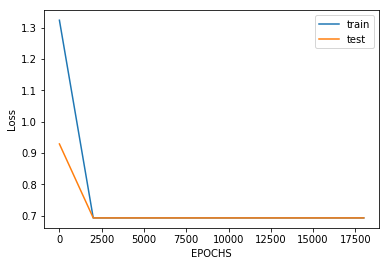

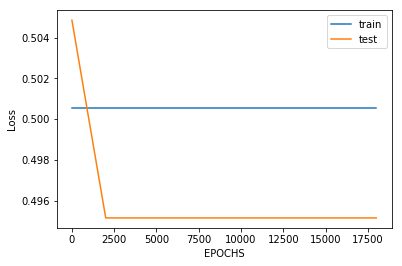

In [18]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_loss(epoch_his,train_acc_his,test_acc_his)

# Simple Multiclass classification dataset

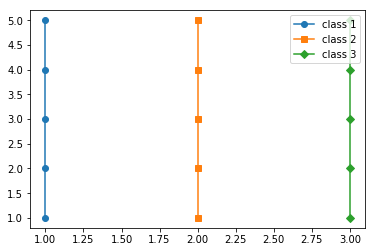

In [19]:
xcoords1 = [1,1,1,1,1]
xcoords2 = [2,2,2,2,2]
xcoords3 = [3,3,3,3,3]
ycoords = [1,2,3,4,5]
plt.plot(xcoords1, ycoords, label='class 1',marker='o')
plt.plot(xcoords2, ycoords, label='class 2',marker='s')
plt.plot(xcoords3, ycoords, label='class 3',marker='D')
plt.legend(loc='best')
plt.show()

In [20]:
#Making the dataset
dataset = [[i,j] for i in range(1,6) for j in range(1,4)]
labels = [[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1]]

In [21]:
div = 0.8
N = len(dataset)
X_train = np.array(dataset[:int(div*N)])
Y_train = np.array(labels[:int(div*N)])
X_test = np.array(dataset[int(div*N):])
Y_test = np.array(labels[int(div*N):])

In [22]:
layer_list = [2,6,3]#,8,8,8,6,3]
activation_list = ['relu','sigmoid']#,'relu','relu','relu','relu']
model = MultiLayerPerceptron(layer_list,activation_list)

(2, 6) (6,)
<function relu at 0x7f1c10610bf8>
(6, 3) (3,)
<function sigmoid at 0x7f1c106109d8>


In [23]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_multiclass',
                                                                                loss_function_string='mean_multiclass_cross_entropy',
                                                                                epochs = 20000,
                                                                                record_at = 1000,
                                                                                learning_rate= 0.1,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:0.06914826048660201|Training Accuracy:0.3333333333333333|Test Loss:-0.0|Test Accuracy:0.3333333333333333
1000th EPOCH:
Training Loss:1.058788242333167e-11|Training Accuracy:0.3333333333333333|Test Loss:-0.0|Test Accuracy:0.3333333333333333
2000th EPOCH:
Training Loss:1.0498342936384335e-11|Training Accuracy:0.3333333333333333|Test Loss:-0.0|Test Accuracy:0.3333333333333333
3000th EPOCH:
Training Loss:1.0410080205915578e-11|Training Accuracy:0.3333333333333333|Test Loss:-0.0|Test Accuracy:0.3333333333333333
4000th EPOCH:
Training Loss:1.032309423192539e-11|Training Accuracy:0.3333333333333333|Test Loss:-0.0|Test Accuracy:0.3333333333333333
5000th EPOCH:
Training Loss:1.0237348006979607e-11|Training Accuracy:0.3333333333333333|Test Loss:-0.0|Test Accuracy:0.3333333333333333
6000th EPOCH:
Training Loss:1.0152804523644073e-11|Training Accuracy:0.3333333333333333|Test Loss:-0.0|Test Accuracy:0.3333333333333333
7000th EPOCH:
Training Loss:1.0069463781918776e-11|Train

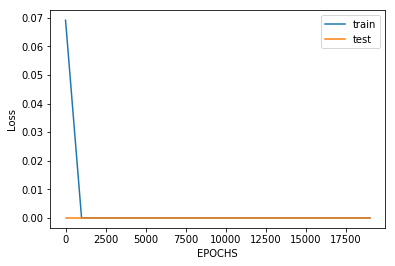

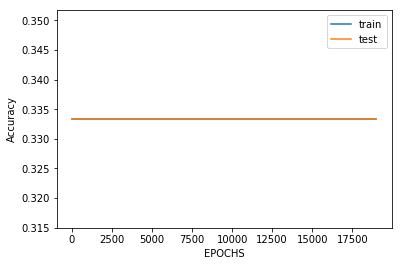

In [24]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)

# gene expression cancer RNA-Seq Data Set
From UCI Machine Learning Dataset Repository  
By Samuele Fiorini, University of Genoa  
Link : https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#

In [ ]:
dataset = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/data.csv')
labels = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/labels.csv')